# Install Dependencies and Fetch Dataset

In [90]:
random_state = 1
from pprint import pprint

In [91]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## Data Preparation

In [92]:
# test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Exploratory Data Analysis (EDA)

## Data Inspection

In [93]:
import pandas as pd
# Display the first few rows of the features and target
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4152,6.3,0.13,0.42,1.1,0.043,63.0,146.0,0.99066,3.13,0.72,11.2
931,7.4,0.61,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8
4252,6.4,0.28,0.27,11.0,0.042,45.0,148.0,0.99786,3.14,0.46,8.7
1743,8.1,0.20,0.40,2.0,0.037,19.0,87.0,0.99210,3.12,0.54,11.2
1238,8.1,0.73,0.00,2.5,0.081,12.0,24.0,0.99798,3.38,0.46,9.6


,quality
4152,7
931,5
4252,5
1743,6
1238,4


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3772,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.200000
6009,5.7,0.24,0.47,6.30,0.069,35.0,182.0,0.99391,3.11,0.46,9.733333
3464,7.6,0.36,0.44,8.30,0.255,28.0,142.0,0.99580,3.12,0.43,10.200000
1518,7.4,0.47,0.46,2.20,0.114,7.0,20.0,0.99647,3.32,0.63,10.500000
3761,9.9,0.49,0.23,2.40,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000


,quality
3772,5
6009,5
3464,6
1518,5
3761,6


In [94]:
# Display the shape of the features and target
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5197, 11)
Shape of y_train: (5197, 1)
Shape of X_test: (1300, 11)
Shape of y_test: (1300, 1)


In [95]:
# Display the data types of the features and target
print("Data types of features (X):")
print(X_train.dtypes)
print("\nData types of target (y):")
print(y_train.dtypes)

Data types of features (X):
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Data types of target (y):
quality    int64
dtype: object


## Check for Missing Values

In [96]:
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
print("Missing values in features (X):")
print(missing_values_X)
print("\nMissing values in target (y):")
print(missing_values_y)

Missing values in features (X):
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Missing values in target (y):
quality    0
dtype: int64


## Summary Statistics

In [97]:
summary_X_train = X_train.describe()
print("Summary statistics for features (X_train):")
print(summary_X_train)

Summary statistics for features (X_train):
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5197.000000       5197.000000  5197.000000     5197.000000   
mean        7.218838          0.340615     0.317935        5.407129   
std         1.295745          0.164782     0.145180        4.719472   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.410000     0.390000        8.100000   
max        15.900000          1.330000     1.230000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5197.000000          5197.000000           5197.000000  5197.000000   
mean      0.056392            30.542043            115.370887     0.994695   
std       0.035482            17.876644             56.604784     0.002990   
min  

In [98]:
summary_y_train = y_train.describe()
print("\nSummary statistics for target (y_train):")
print(summary_y_train)


Summary statistics for target (y_train):
           quality
count  5197.000000
mean      5.825476
std       0.878131
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000


## Visualizations

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

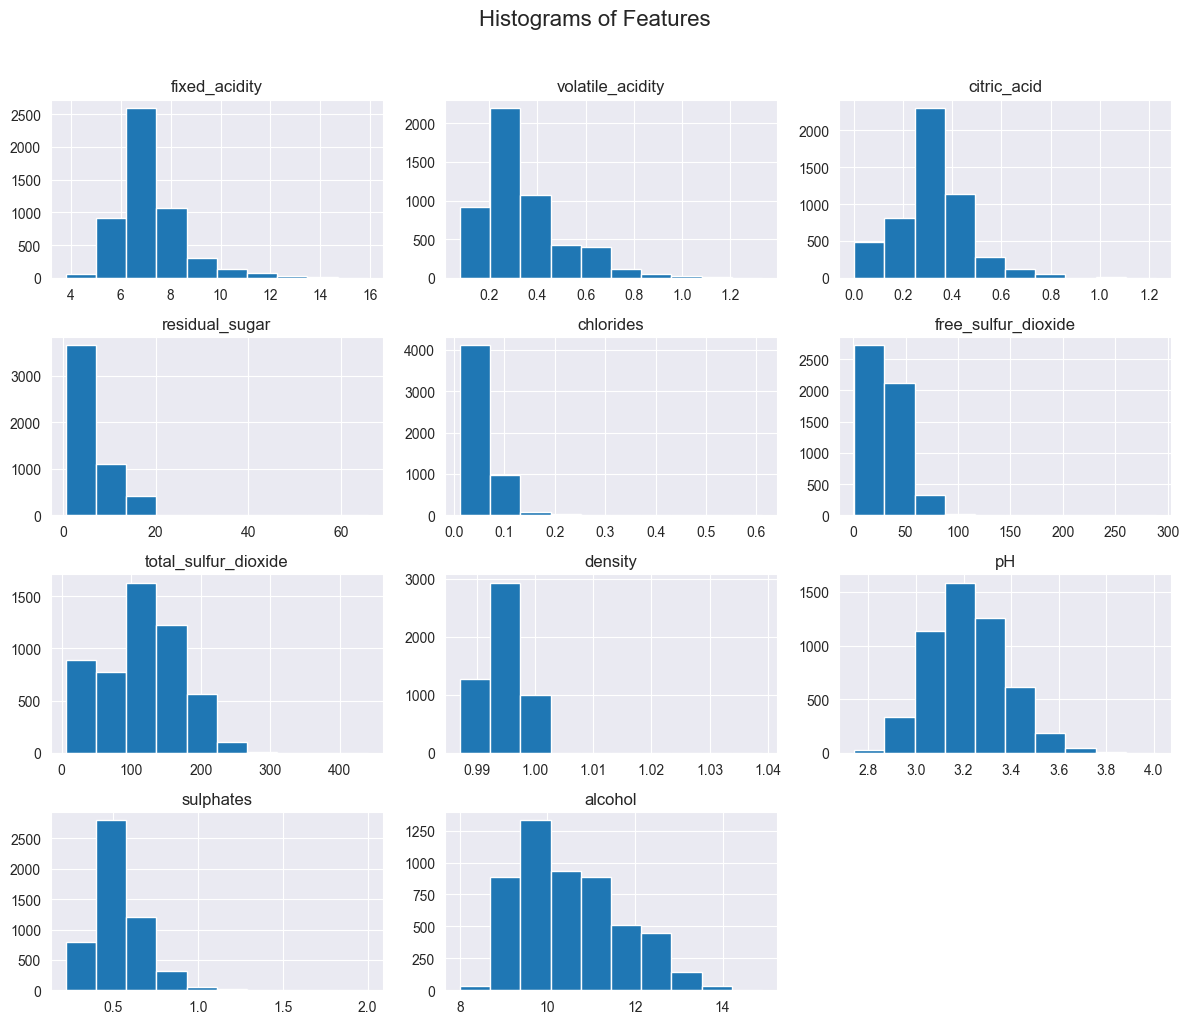

In [100]:
# Histograms for each feature
X_train.hist(figsize=(12, 10))
plt.suptitle("Histograms of Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

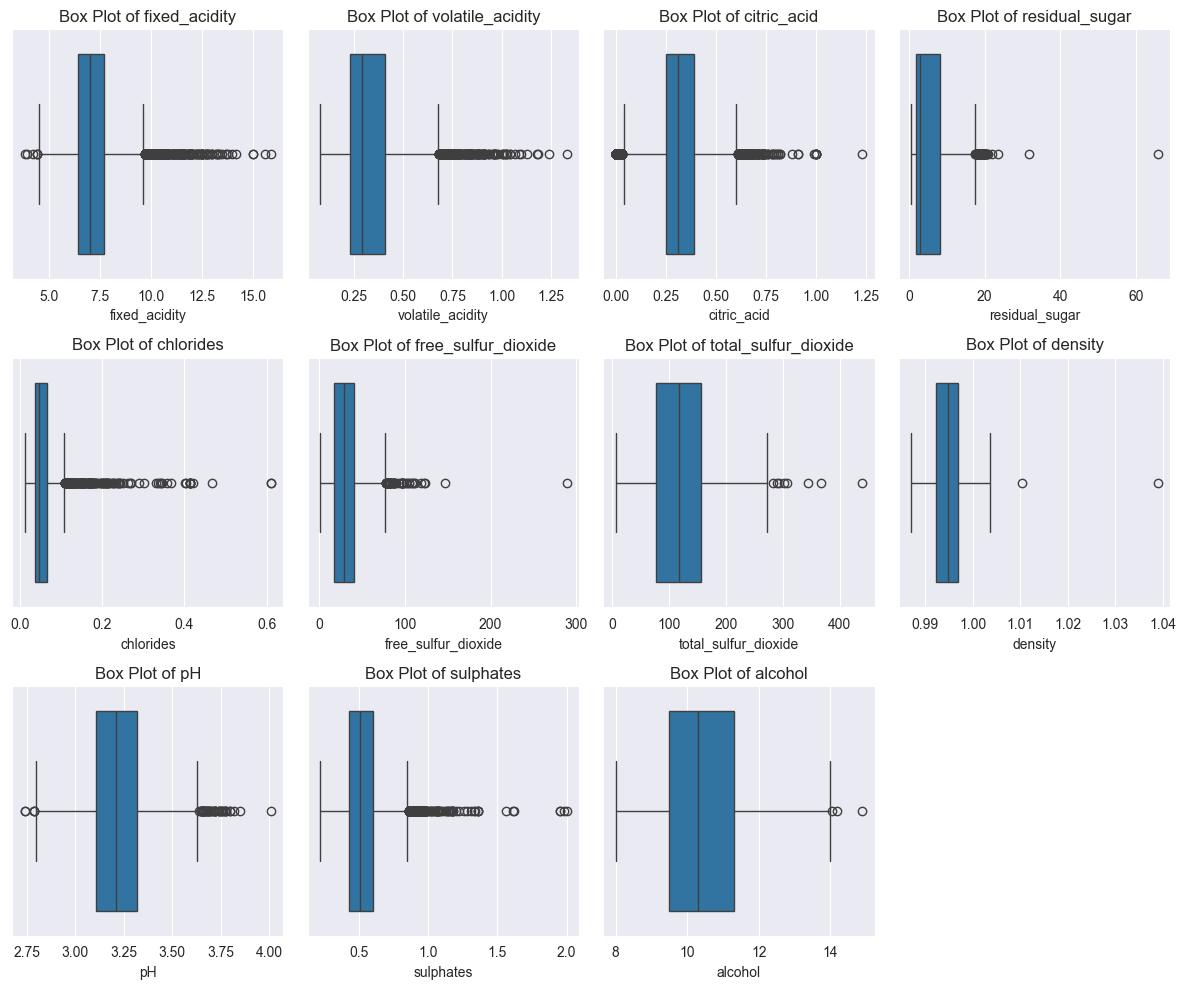

In [101]:
# Box plots for each feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=X_train[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

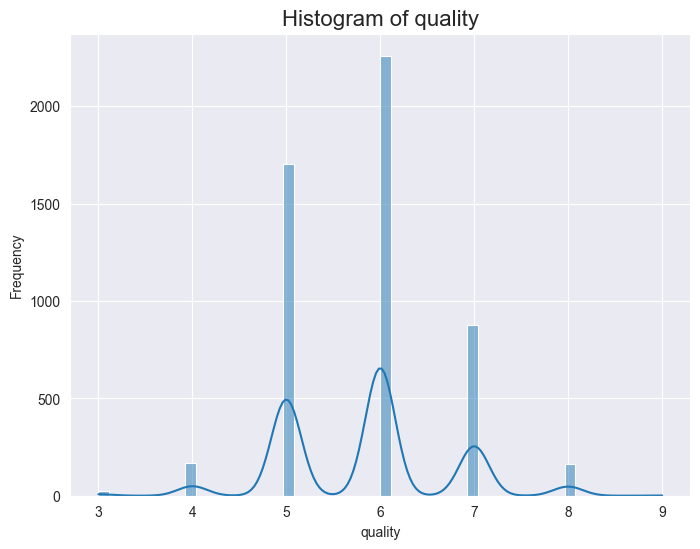

In [102]:
# Histogram of quality
plt.figure(figsize=(8, 6))
sns.histplot(y_train["quality"], kde=True)
plt.title("Histogram of quality", fontsize=16)
plt.xlabel("quality")
plt.ylabel("Frequency")
plt.show()

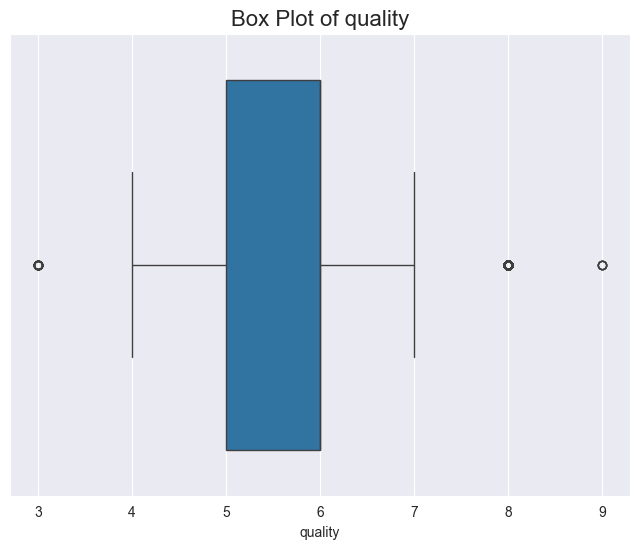

In [103]:
# Box Plot of quality
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train["quality"])
plt.title("Box Plot of quality", fontsize=16)
plt.xlabel("quality")
plt.show()

## Correlation Analysis

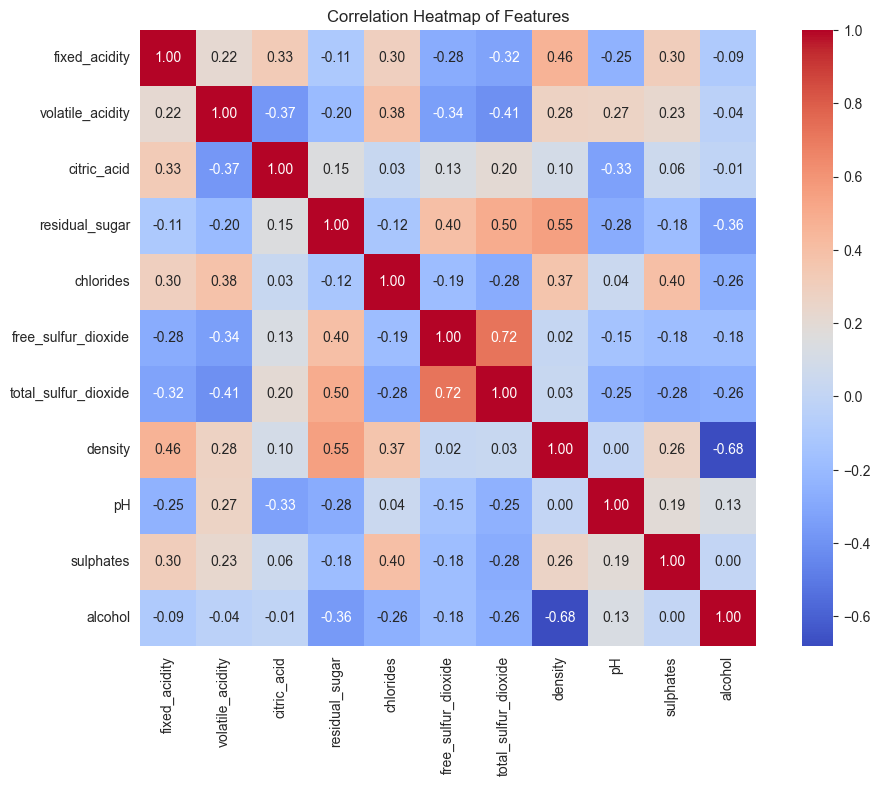

In [104]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

# Bayesian Optimization

## Objective Function

The goal is to optimize the wine quality using Bayesian optimization. The objective function will be defined to minimize the negative of the quality, as we want to maximize it. The parameters to be optimized will include the features of the wine.

In [105]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

In [106]:
# Define the model
model = RandomForestRegressor(random_state=random_state)

In [107]:
# Define the search space for hyperparameters
search_space = {
    'n_estimators': (50, 500),  # Number of trees in the forest
    'max_depth': (5, 50),        # Maximum depth of the tree
    'min_samples_split': (2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [108]:
# Define the Bayesian optimization search
opt = BayesSearchCV(
    model,
    search_space,
    n_iter=50,  # Number of iterations for optimization
    scoring='neg_mean_squared_error',  # Objective function to minimize
    cv=5,  # Cross-validation splitting strategy
    n_jobs=-1,  # Use all available cores
    random_state=random_state
)

In [109]:
# Fit the model using Bayesian optimization
opt.fit(X_train, y_train.values.ravel())

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
              random_state=1, scoring='neg_mean_squared_error',
              search_spaces={'bootstrap': [True, False], 'max_depth': (5, 50),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (50, 500)})

In [110]:
# Display the best parameters found by Bayesian optimization
print("Best parameters found by Bayesian optimization:")
pprint(opt.best_params_)

Best parameters found by Bayesian optimization:
OrderedDict([('bootstrap', False),
             ('max_depth', 50),
             ('max_features', 'log2'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 2),
             ('n_estimators', 472)])


In [111]:
# Display the best score achieved
print(f"Best score achieved (negative MSE): {opt.best_score_}")

Best score achieved (negative MSE): -0.37215148283168203


In [112]:
# Evaluate the optimized model on the test set
from sklearn.metrics import mean_squared_error
y_pred = opt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 0.350410438948799


## Use Optimized Model to Optimize Quality using Bayesian Optimization

In [113]:
# Use the optimized model to predict quality
optimized_quality = opt.predict(X_test)
print("Predicted quality using Optimized Model:")
print(optimized_quality)

Predicted quality using Optimized Model:
[5.29449153 5.         5.47033898 ... 5.         5.47881356 7.        ]


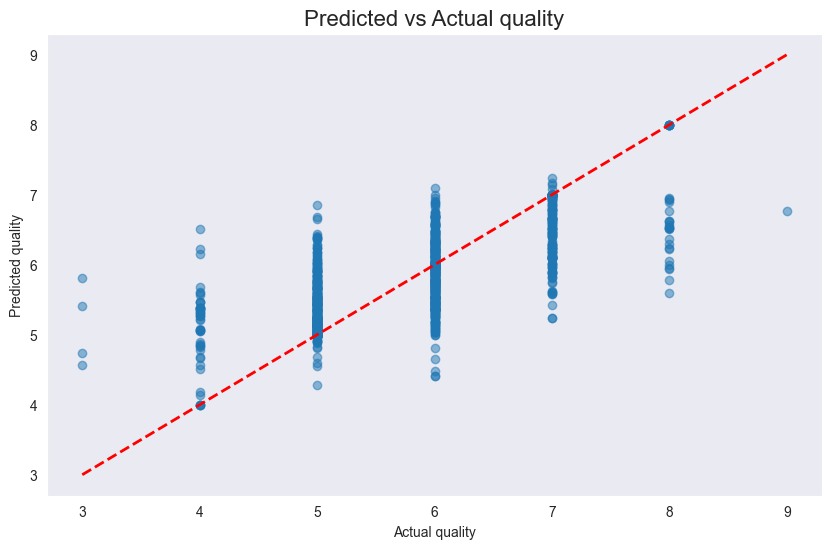

In [114]:
# Visualize the predicted vs actual quality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_quality, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual quality', fontsize=16)
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.grid()
plt.show()

In [115]:
# First check the actual column names in the DataFrame
print("Actual column names in X_train:")
print(X_train.columns.tolist())

Actual column names in X_train:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [116]:
# Objective function for Bayesian optimization
def objective_function(params):
    """
    Objective function to minimize the negative of the quality.
    This function takes a the parameters of the wine and returns the negative quality.
    """
    # Unpack the parameters
    fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol = params
    # Create a DataFrame with the parameters
    wine_feat = pd.DataFrame({
        'fixed_acidity': [fixed_acidity],
        'volatile_acidity': [volatile_acidity],
        'citric_acid': [citric_acid],
        'residual_sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free_sulfur_dioxide': [free_sulfur_dioxide],
        'total_sulfur_dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })
    # Predict the quality using the optimized model
    predicted_quality = opt.predict(wine_feat)
    # Return the negative quality (as we want to maximize it)
    return -predicted_quality[0]

In [117]:
# Define the search space for the parameters of the wine based on the min and max values in the training set
search_space_wine = [
    (X_train['fixed_acidity'].min(), X_train['fixed_acidity'].max()),  # fixed_acidity
    (X_train['volatile_acidity'].min(), X_train['volatile_acidity'].max()),  # Slag
    (X_train['citric_acid'].min(), X_train['citric_acid'].max()),  # Ash
    (X_train['residual_sugar'].min(), X_train['residual_sugar'].max()),  # residual_sugar
    (X_train['chlorides'].min(), X_train['chlorides'].max()),  # chlorides
    (X_train['free_sulfur_dioxide'].min(), X_train['free_sulfur_dioxide'].max()),  # free_sulfur_dioxide
    (X_train['total_sulfur_dioxide'].min(), X_train['total_sulfur_dioxide'].max()),  # total_sulfur_dioxide
    (X_train['density'].min(), X_train['density'].max()),  # density
    (X_train['pH'].min(), X_train['pH'].max()),  # pH
    (X_train['sulphates'].min(), X_train['sulphates'].max()),  # sulphates
    (X_train['alcohol'].min(), X_train['alcohol'].max())  # alcohol
]

In [118]:
from skopt import gp_minimize
# Perform Bayesian optimization to find the optimal wine parameters
result = gp_minimize(
    objective_function,
    search_space_wine,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0569
Function value obtained: -4.9131
Current minimum: -4.9131
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0478
Function value obtained: -5.6441
Current minimum: -5.6441
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0458
Function value obtained: -5.7754
Current minimum: -5.7754
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0508
Function value obtained: -5.1970
Current minimum: -5.7754
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0597
Function value obtained: -5.9174
Current minimum: -5.9174
Iteration No: 6 started. 

In [119]:
# Neatly display the best parameters and the best predicted quality along with column names
best_params = result.x
best_quality = -result.fun  # Negate the result to get the actual quality
print("Best parameters found by Bayesian optimization:")
for i, param in enumerate(best_params):
    print(f"{X_train.columns[i]}: {param}")
print(f"Best predicted quality: {best_quality}")

Best parameters found by Bayesian optimization:
fixed_acidity: 7.150343588471379
volatile_acidity: 0.08
citric_acid: 0.3240662078760269
residual_sugar: 6.79123884960786
chlorides: 0.012
free_sulfur_dioxide: 108.95713256565803
total_sulfur_dioxide: 235.79226512182925
density: 0.98711
pH: 2.7467991478437046
sulphates: 0.8236597640008829
alcohol: 13.015284251189712
Best predicted quality: 7.093220338983051


## Use XGBoost for the Model instead of Random Forest

In [120]:
from xgboost import XGBRegressor

In [121]:
# Define the XGBoost model
xgb_model = XGBRegressor(random_state=random_state, n_jobs=-1)

In [122]:
# Define the Bayesian optimization search for XGBoost hyperparameters
xgb_search_space = {
    'n_estimators': (50, 500),  # Number of trees in the forest
    'max_depth': (3, 10),        # Maximum depth of the tree
    'learning_rate': (0.01, 0.3, 'uniform'),  # Step size shrinkage used in update to prevent overfitting
    'subsample': (0.5, 1.0, 'uniform'),  # Subsample ratio of the training instances
    'colsample_bytree': (0.5, 1.0, 'uniform'),  # Subsample ratio of columns when constructing each tree
    'gamma': (0, 5),  # Minimum loss reduction required to make a further partition on a leaf
    'reg_alpha': (0, 1),  # L1 regularization term on weights
    'reg_lambda': (0, 1)  # L2 regularization term on weights
}

In [123]:
# Define the Bayesian optimization search for XGBoost
xgb_opt = BayesSearchCV(
    xgb_model,
    xgb_search_space,
    n_iter=50,  # Number of iterations for optimization
    scoring='neg_mean_squared_error',  # Objective function to minimize
    cv=5,  # Cross-validation splitting strategy
    n_jobs=-1,  # Use all available cores
    random_state=random_state
)

In [124]:
# Fit the XGBoost model using Bayesian optimization
xgb_opt.fit(X_train, y_train.values.ravel())

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
              n_jobs=-1, random_state=1, scoring='neg_mean_squared_error',
              search_spaces={'colsample_bytree': (0.5, 1.0, 'uniform'),
                             'gamma': (0, 5),
                             'learning_rate': (0.01, 0.3, 'uniform'),
                             'max_depth': (3, 10), 'n_estimators': (50, 500),
                             'reg_alpha': (0, 1), 'reg_lambda': (0, 1),
                             'subsample': (0.5, 1.0, 'uniform')})

In [125]:
# Display the best parameters found by Bayesian optimization for XGBoost
print("Best parameters found by Bayesian optimization for XGBoost:")
pprint(xgb_opt.best_params_)

Best parameters found by Bayesian optimization for XGBoost:
OrderedDict([('colsample_bytree', 0.8815948240273401),
             ('gamma', 0),
             ('learning_rate', 0.01),
             ('max_depth', 10),
             ('n_estimators', 500),
             ('reg_alpha', 0),
             ('reg_lambda', 0),
             ('subsample', 1.0)])


In [126]:
# Display the best score achieved by XGBoost
print(f"Best score achieved (negative MSE) by XGBoost: {xgb_opt.best_score_}")

Best score achieved (negative MSE) by XGBoost: -0.3886396586894989


In [127]:
# Evaluate the optimized XGBoost model on the test set
y_pred_xgb = xgb_opt.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error on test set by XGBoost: {mse_xgb}")

Mean Squared Error on test set by XGBoost: 0.36908233165740967


In [128]:
# Use the optimized XGBoost model to predict quality
optimized_quality_xgb = xgb_opt.predict(X_test)
print("Predicted quality using Optimized XGBoost Model:")
print(optimized_quality_xgb)

Predicted quality using Optimized XGBoost Model:
[5.3500857 5.195829  5.3894143 ... 5.0452123 5.3936224 6.760103 ]


In [129]:
# Objective function for Bayesian optimization with XGBoost
def objective_function_xgb(params):
    """
    Objective function to minimize the negative of the quality using XGBoost.
    This function takes the parameters of the wine and returns the negative quality.
    """
    # Unpack the parameters
    fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol = params
    # Create a DataFrame with the parameters
    wine_feat = pd.DataFrame({
        'fixed_acidity': [fixed_acidity],
        'volatile_acidity': [volatile_acidity],
        'citric_acid': [citric_acid],
        'residual_sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free_sulfur_dioxide': [free_sulfur_dioxide],
        'total_sulfur_dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })
    # Predict the quality using the optimized XGBoost model
    predicted_quality = xgb_opt.predict(wine_feat)
    # Return the negative quality (as we want to maximize it)
    return -predicted_quality[0]

In [130]:
# Define the search space for the parameters of the wine based on the min and max values in the training set
search_space_wine_xgb = [
    (X_train['fixed_acidity'].min(), X_train['fixed_acidity'].max()),  # fixed_acidity
    (X_train['volatile_acidity'].min(), X_train['volatile_acidity'].max()),  # Slag
    (X_train['citric_acid'].min(), X_train['citric_acid'].max()),  # Ash
    (X_train['residual_sugar'].min(), X_train['residual_sugar'].max()),  # residual_sugar
    (X_train['chlorides'].min(), X_train['chlorides'].max()),  # chlorides
    (X_train['free_sulfur_dioxide'].min(), X_train['free_sulfur_dioxide'].max()),  # free_sulfur_dioxide
    (X_train['total_sulfur_dioxide'].min(), X_train['total_sulfur_dioxide'].max()),  # total_sulfur_dioxide
    (X_train['density'].min(), X_train['density'].max()),  # density
    (X_train['pH'].min(), X_train['pH'].max()),  # pH
    (X_train['sulphates'].min(), X_train['sulphates'].max()),  # sulphates
    (X_train['alcohol'].min(), X_train['alcohol'].max())  # alcohol
]

In [131]:
from skopt import gp_minimize
# Perform Bayesian optimization to find the optimal wine parameters using XGBoost
result_xgb = gp_minimize(
    objective_function_xgb,
    search_space_wine_xgb,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0074
Function value obtained: -5.1195
Current minimum: -5.1195
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0053
Function value obtained: -5.6181
Current minimum: -5.6181
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0068
Function value obtained: -5.9196
Current minimum: -5.9196
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0076
Function value obtained: -5.1341
Current minimum: -5.9196
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0078
Function value obtained: -6.4356
Current minimum: -6.4356
Iteration No: 6 started. 

In [132]:
# Neatly display the best parameters and the best predicted quality along with column names for XGBoost
best_params_xgb = result_xgb.x
best_quality_xgb = -result_xgb.fun  # Negate the result to get the actual quality
print("Best parameters found by Bayesian optimization for XGBoost:")
for i, param in enumerate(best_params_xgb):
    print(f"{X_train.columns[i]}: {param}")
print(f"Best predicted quality using XGBoost: {best_quality_xgb}")

Best parameters found by Bayesian optimization for XGBoost:
fixed_acidity: 10.013399894408249
volatile_acidity: 0.39136449110066157
citric_acid: 0.0
residual_sugar: 0.6
chlorides: 0.012
free_sulfur_dioxide: 232.42231255007033
total_sulfur_dioxide: 6.0
density: 1.03898
pH: 2.74
sulphates: 2.0
alcohol: 13.471288158658222
Best predicted quality using XGBoost: 7.824429512023926


# Conclusion

In this notebook, I have demonstrated how to perform Bayesian optimization on a wine quality dataset using both Random Forest and XGBoost models. The process involved:
1. Fetching the dataset and preparing it for analysis.
2. Conducting exploratory data analysis (EDA) to understand the data.
3. Implementing Bayesian optimization to find the best hyperparameters for the models.
4. Evaluating the optimized models on a test set.
5. Using the optimized models to predict wine quality based on the features.
The results showed that both models could effectively predict wine quality, with XGBoost providing a slightly better performance in terms of mean squared error. The best parameters found through Bayesian optimization were also displayed, allowing for further insights into the optimal conditions for wine quality prediction.